# An idea about Google peak hours and fast charging infrastructure 

Can ultra-fast charging stations with buffer storage help to accelerate the mobility transition? Can I tell from the utilisation of gas stations whether it is worth installing a fast charging station with buffer storage there? In which places is it possible to provide very high charging power without extending the electricity grid? 

## Ultra fast charging

In the majority of cases, electric vehicles are charged relatively slowly, i.e. with low to medium charging power (i.e. in the private sector between 4.6 kW and 11 kW at public charging stations often 22 kW up to 50 kW)*. Since vehicles are often parked, these charging powers are sufficient to fully charge the vehicle battery again within a few hours. Waiting times are less relevant in this case than, for example, for transit or long-distance commercial trips. In such cases, charging times should be kept as short as possible. So-called fast-charging stations are used for this purpose. These have power ratings far above 100 kW. Modern electric vehicles can be charged with power of up to 350 kW. 

![High Power Charger Plug](./hpc_stecker_M.Verch.jpg)

"HPC-Stecker IONITY: High-Power-Charging-Ladestecker an ein Elektroauto angeschlossen" by verchmarco is licensed under CC BY-NC-ND 2.0 

This means that the charge level of a vehicle battery can be raised to a usable level within a few minutes so that it can be driven for hundreds of kilometres. More details on charging behaviour can be found here, among other places [ADAC](https://www.adac.de/rund-ums-fahrzeug/tests/elektromobilitaet/schnellladen-langstrecke-ladekurven/).

** *See distribution of charging capacities below (note: frequency is shown logarithmically); data source: [Charging station register of the BNetzA](https://www.bundesnetzagentur.de/DE/Sachgebiete/ElektrizitaetundGas/Unternehmen_Institutionen/E-Mobilitaet/start.html;jsessionid=ED8DDDE3D89698EE5FE719B615BFE25E)**

In [1]:
import pandas as pd

Text(0.5, 0, 'charging power in kW')

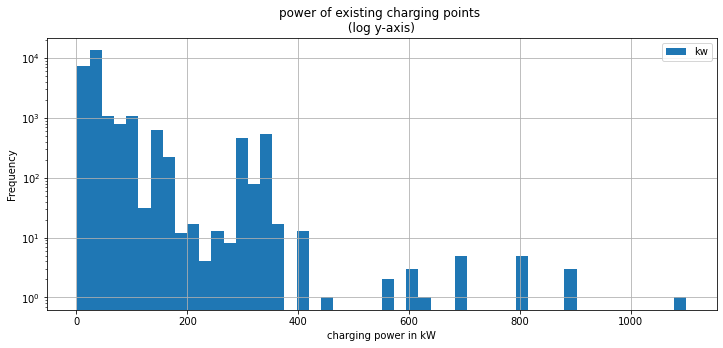

In [2]:
df = pd.read_csv('ladeleistungen_Ladesaeulenregister_BNETZA_2022_02_03.csv', header=None, sep='\n')
df = df.apply(lambda x: x.str.replace(',','.')).astype('float')
df.columns = ['kw']
ax = df.plot.hist(log=True, figsize=(12,5), bins=50, grid=True, title='power of existing charging points \n (log y-axis) ')
ax.set_xlabel("charging power in kW")

## A problem ?
The electricity for charging electric vehicles usually comes from the public grid, sometimes also in connection with a larger renewable energy system. The electricity for charging cannot be taken from the grid at any power level. In some places, the power grid connection is not sufficient to provide the desired power for fast charging of several vehicles at the same time. In this case, it is possible to expand the power grid connection, but this can take several month or be very expensive. 
With a charging capacity of e.g. 200 kW per charging point (as is currently planned for around 1,000 locations in Germany), many hundreds of kW quickly add up. The largest category of fast charging locations put out to tender is to have 16 such charging points. This means that grid connections of 3,200 kW are necessary for just one such charging location. In order to be able to supply such locations from the public grid, new grid equipment (transformers) and lines are necessary in some cases. For comparison, a simple local grid transformer has for example 630 kW. In addition, the charging points are not used continuously. There is a lot of idling. This means that the small amount of electricity needed to charge a car battery can be very expensive, because the cost of the power provided for this purpose is very high.

## Buffer storage
This is where buffer storage comes into the picture. These are usually large lithium-ion batteries in container that can provide, for example, 3,000 kW of charging power for 1 hour. These large batteries can be charged from the existing electricity grid and from renewables. If vehicles are to be charged with high power, the power from the grid and the battery can be provided collectively. At times when no or fewer vehicles are being charged, the battery can be recharged from the electricity grid.
The question now is how busy are gas stations these days, and how large are the time gaps to recharge such buffer storage batteries.These offer the electricity for fast charging, for example, parallel to the electricity from the public grid. When the electricity from the public grid is not needed for charging vehicles, the buffer storage can be filled again with grid electricity. The total available charging power can be increased. In addition, the strong fluctuations between peak times and idle times are balanced out.
 

![symbol](battery_icon.png)


## Basic idea of data analysis
It is assumed that the behaviour of commercial car traffic and long-distance journeys of private persons with electric vehicles is similar to that with conventional vehicles. Therefore, the customer volume at today's gas stations could provide information on how future fast-charging infrastructure could be used in terms of time. 
Based on this, estimates could be made on the size of the above-mentioned buffer storage systems. This would make it possible to make statements about the relationship between the public electricity grid and buffer storage for fast-charging facilities in different scenarios (with regard to the existing grid connection or necessary grid development).


## Data needed
In order to be able to make the planned evaluations, the peak times at gas stations are to be used. Of particular interest are those at major traffic junctions and motorways. Google Maps offers information on peak times for many shops. The averaged relative customer numbers (0 - 100%) are displayed for each hour of a day, for a week*. In addition, information is provided on whether the shop is still in operation or no longer (i.e. closed for good). In combination with a few data on the business field (petrol station, car park, café) and geo-localisation, it should be possible to carry out some useful analyses. 

** *a sample from Googles peak time data **

Text(0, 0.5, 'customer percentage')

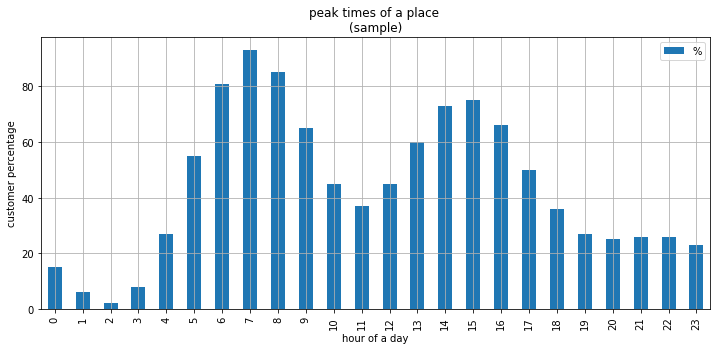

In [3]:
df = pd.read_csv('a_sample.csv', header=None)
df = df.iloc[3:]
df = df.reset_index().drop(["index"], axis=1)
df.columns = ['%']
ax = df.plot.bar(figsize=(12,5), grid=True, title='peak times of a place \n(sample)')
ax.set_xlabel("hour of a day")
ax.set_ylabel("customer percentage")

##  Executive summary

I will use a VPS with Debian 10 and nginx , on which a Postgresql Database and Jupyter Notebook Server are already running.

The data for the above considerations are collected in two steps. First, gas stations are searched for that are associated with motorways and as far as possible in all counties, at least in the region of high population density areas. In the second step, the associated peak hours of the places are fetched. 

To perform a search for gas stations, a Google Place API is used. Unfortunately, only a total of 1,000 queries are available for this. However, it is not possible to query peak times via this API. For this reason, and because the limited number of available queries would not be sufficient to cover a total of 15,000 petrol stations, the websites with the peak times are fetched via a Selenium webdriver. 

The search for gas station locations was carried out in two ways. For the best possible geographical distribution, searches for gas stations were carried out for each county. In order to obtain values for locations that are as relevant as possible, such as those along motorways, additional lists of search terms were included. These include towns with more than 90,000 inhabitants and all one- and two-digit motorway numbers.

From the response of the API, the Google Place ID is used to access exactly this location via the Selenium webdriver. The values for the interactive presentation of the peak times are located in the js code of the Google maps website. These are read, prepared for the database and stored. 

The data collected in the database contains a comprehensive share of the German gas stations. Almost all of the motorway gas stations are included. The geographical distribution shows that all urban centres and motorways are covered. Initial assessments can show that the data are sufficiently well distributed to provide a good overview of the different use cases.

A first analysis of the peak hours shows that the utilisation of motorway gas stations varies significantly. It can be seen that a large proportion of gas stations are not continuously high or evenly high busy. This raises the possibility of considering the use of buffer storage.

The detailed descriptions and code are given in the following parts:

1. Data base

2. Fetching and processing data

3. Brief data assessment

4. Initial analysis
    
    